In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler

In [2]:
df = pd.read_csv("titanic.csv")

# Preprocessing

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# there are some missing values in columns namely "Age","Cabin" and "Embarked".
# Age is numerical data type where Cabin and Embarked are with object data type.
# There are some columns that are not useful so I drop those columns and consider only columns that are useful as per our requiremnet of target.
# I fill "Age" column by median or mean as it is numerical and "Embarked" with mode as it is object data type

In [10]:
# Impute missing Age values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
df.Age.isnull().sum()

0

In [12]:
# Fill missing Embarked values with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [13]:
# Drop the Cabin column if too many values are missing
df= df.drop(['Cabin'], axis=1)

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
# Convert categorical features ('Sex', 'Embarked') into numerical values
ohe = OneHotEncoder(drop = "first",sparse_output = False)
df['Sex'] = ohe.fit_transform(df[['Sex']])
df['Embarked'] = ohe.fit_transform(df[['Embarked']])

In [23]:
df['Sex']

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
886    1.0
887    0.0
888    0.0
889    1.0
890    1.0
Name: Sex, Length: 891, dtype: float64

In [24]:
df['Embarked']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    1.0
Name: Embarked, Length: 891, dtype: float64

# EDA

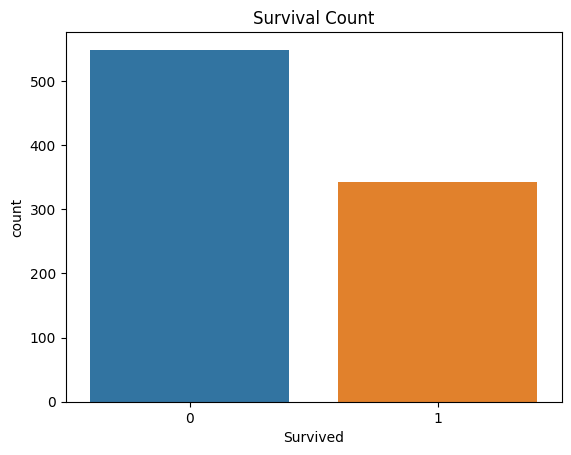

In [16]:
# Plot the count of survivors vs non-survivors
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

In [17]:
# Get the percentage of survivors
survival_rate = df['Survived'].value_counts(normalize=True) * 100
print(survival_rate)

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


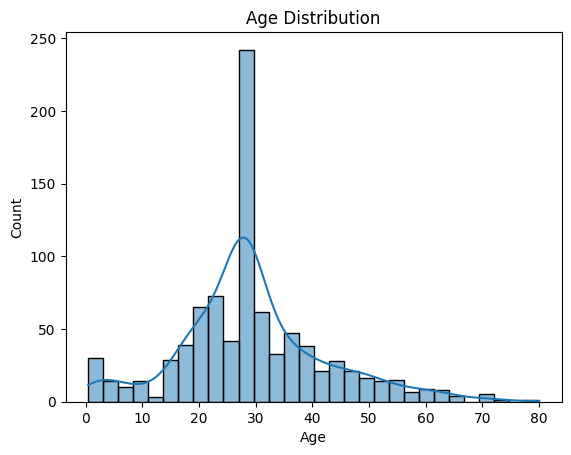

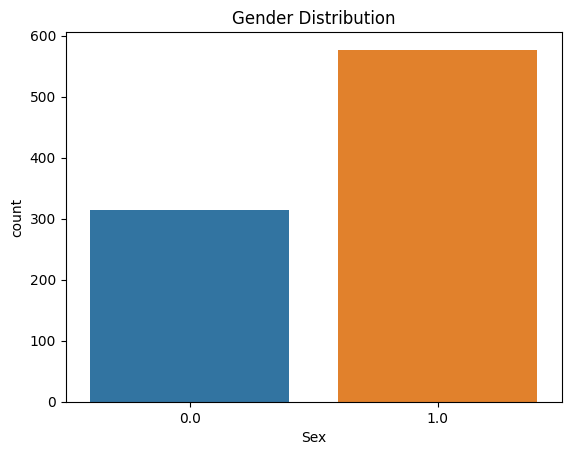

In [18]:
# Plot Age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Plot Gender distribution (count of males vs. females)
sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()


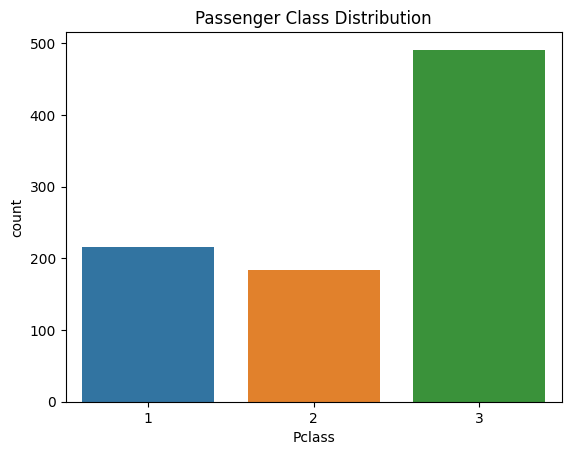

C:\Users\Pakistan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


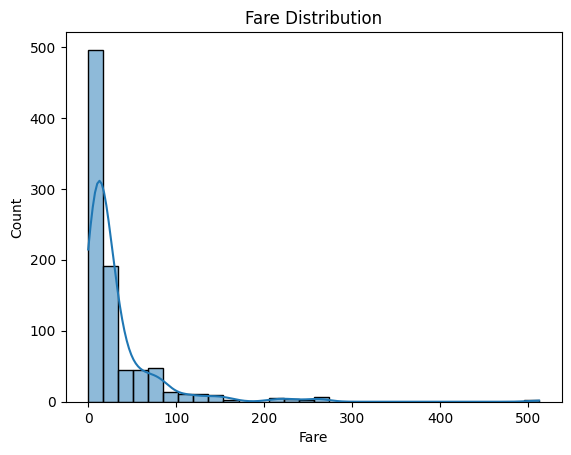

In [19]:
# Plot distribution of socio-economic status (Pclass)
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

# Plot fare distribution
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

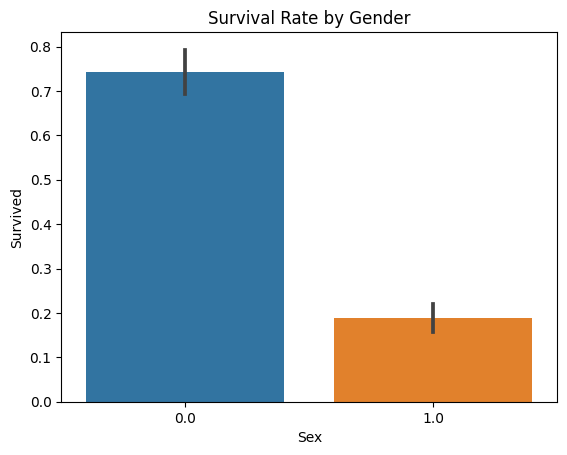

In [20]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

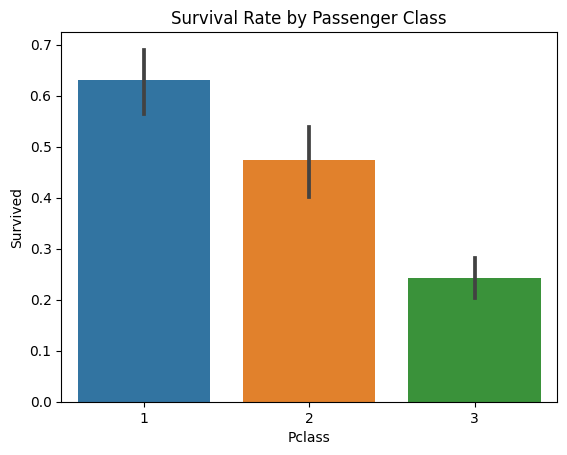

In [21]:
# Survival rate by passenger class (Pclass)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [25]:
# Drop irrelevant columns (e.g., 'Name', 'Ticket', 'Cabin')
df = df.drop(['Name', 'Ticket'], axis=1)

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1.0,22.0,1,0,7.2500,0.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,0.0
3,4,1,1,0.0,35.0,1,0,53.1000,0.0
4,5,0,3,1.0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.0,27.0,0,0,13.0000,0.0
887,888,1,1,0.0,19.0,0,0,30.0000,0.0
888,889,0,3,0.0,28.0,1,2,23.4500,0.0
889,890,1,1,1.0,26.0,0,0,30.0000,0.0


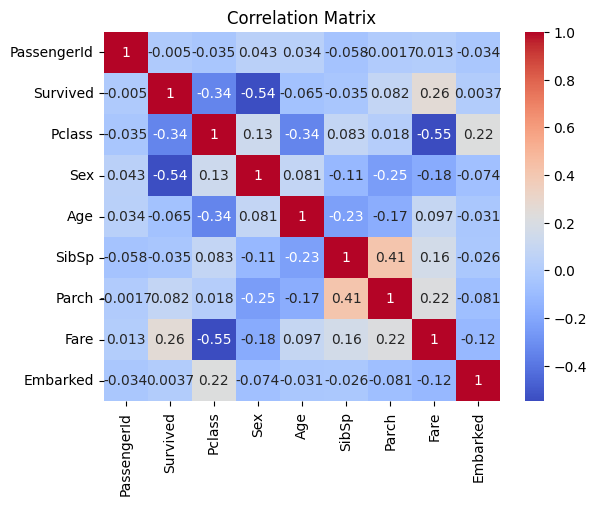

In [27]:
# Correlation matrix (only numerical features)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
# Feature selection
# Define target (y) and features (X)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Features
y = df['Survived']  # Target (1 for survived, 0 for not survived)


In [29]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1.0,45.5,0,0,28.5000,0.0
733,2,1.0,23.0,0,0,13.0000,0.0
382,3,1.0,32.0,0,0,7.9250,0.0
704,3,1.0,26.0,1,0,7.8542,0.0
813,3,0.0,6.0,4,2,31.2750,0.0
...,...,...,...,...,...,...,...
106,3,0.0,21.0,0,0,7.6500,0.0
270,1,1.0,28.0,0,0,31.0000,0.0
860,3,1.0,41.0,2,0,14.1083,0.0
435,1,0.0,14.0,1,2,120.0000,0.0


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
#Model Selection and Training (using RandomForest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
#Make predictions and evaluate the model
y_pred = model.predict(X_test)


In [34]:
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [39]:
#Check accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy = accuracy_score(y_test, y_pred)


In [38]:
accuracy

0.8100558659217877

In [41]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [46]:
#Person with 3rd class ticket, male, 25 years old, no siblings, no parents, fare of 7.25, embarked from port 2
new_person = [[3, 1, 25, 0, 0, 7.25, 2]]
#new_person_scaled = scaler.transform(new_person)
survival_prediction = model.predict(new_person)
print("Survival Prediction (1 = survived, 0 = not survived):", survival_prediction[0])

Survival Prediction (1 = survived, 0 = not survived): 0


C:\Users\Pakistan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [45]:
survival_prediction

array([0], dtype=int64)

# Conclusion

In [48]:
# Fare and P-class:
#passengers in first class (lower Pclass values) tend to pay higher fares, while passengers in third class (higher Pclass values) generally pay less.

In [49]:
# Age and Survival:
#Age alone might not have a strong influence on survival, though other factors

In [50]:
#Pclass and Survival:

#A negative correlation between Pclass and Survived would indicate that passengers in higher classes (lower Pclass values) were more likely to survive. This is a crucial insight into socio-economic status and survival probability.

##### Pclass (a proxy for socio-economic status) and Fare are significant indicators of survival. Passengers in first class (lower Pclass values) and those who paid higher fares generally had better chances of survival, possibly due to their better access to life-saving resources during the sinking.